# Basic Plotting with matplotlib

We can show matplotlib figures directly in the notebook using the `%matplotlib notebook` and `%matplotlib inline` magic commands.

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import matplotlib as mlp
mlp.get_backend()

'module://ipykernel.pylab.backend_inline'

In [3]:
import matplotlib.pyplot as plt 
plt.plot?

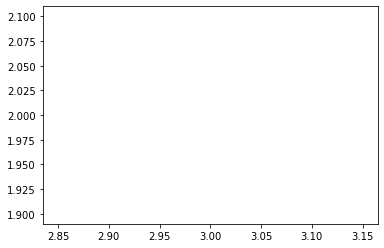

In [4]:
# because the default is the line style '-', nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

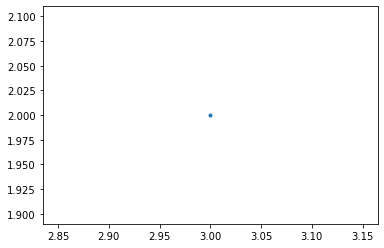

In [5]:
# we can pass in '.' to plt.plot to indicate that we want the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

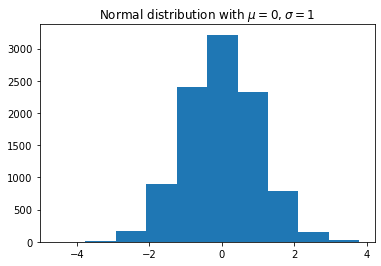

In [6]:
import numpy as np 

x = np.random.randn(10000)
plt.hist(x)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

Let's see how to make a plot without using the scripting layer.

In [7]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [8]:
%%html
<img src='test.png' />

(0.0, 6.0, 0.0, 10.0)

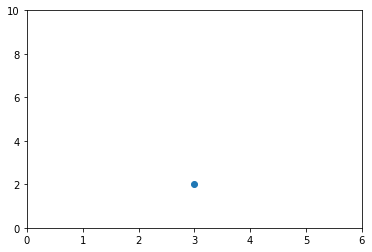

In [9]:
# create a new figure
plt.figure()

# plot the point (3, 2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# set the axes properties ([xmin, xmax, ymin, ymax])
ax.axis([0, 6, 0, 10])

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

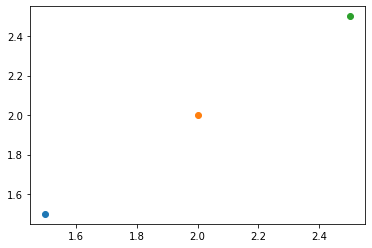

In [10]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

# get the current axes
ax = plt.gca()

# get all the child objects the axes contains
ax.get_children()

# Scatterplots

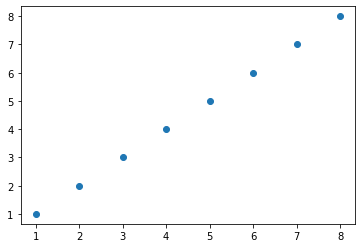

In [11]:
import numpy as np 

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()

# similar to plt.plot(x, y, '.') but the underlying child objects in the axes are not Line2D    
plt.scatter(x, y)

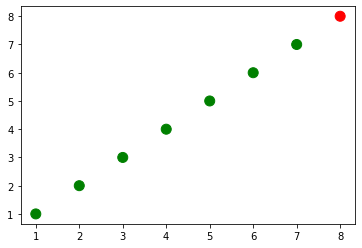

In [12]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']

colors = ['green'] * (len(x) -1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [13]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

print(list(zip_generator))

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


In [14]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

# The single star * unpacks a collection into positional arguments

# Turn the data back into 2 lists. This is like callig zip((1, 6), (2, 7), ...)
x, y = zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


Legend
      Text(0, 0, '')
            Text(0, 0, 'Tall students')
            Text(0, 0, 'Short students')
  FancyBboxPatch((0, 0), width=1, height=1)


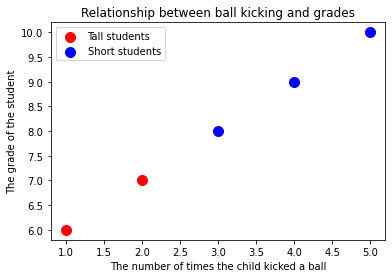

In [15]:
plt.figure()

# plot a data series 'Tall Students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')

# plot a data series 'Short Students' in red using the last two elements of x and y
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')

# add a label to the y axis
plt.ylabel('The grade of the student')

# add a title
plt.title('Relationship between ball kicking and grades')

# add a legend (uses the labels from plt.scatter)
plt.legend()

# add a legend to loc = 4 (lower right hand corner), also gets rid of the frame and adds a title)
plt.legend(loc=4, frameon=False, title='Legend')

# get the children from the current axes (the legend is the second to last item on this list)
plt.gca().get_children()

# get the legend from the current axes
legend = plt.gca().get_children()[-2]

# we can use get children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

# Create a function to see what the legend is made up of
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print(' ' * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth + 2)

rec_gc(plt.legend())

# Line Plots

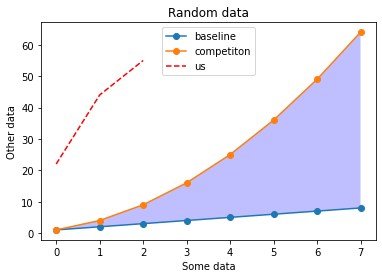

In [16]:
import numpy as np 

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
quadratic_data = linear_data**2

plt.figure()

# plot the linear data and the exponential data
plt.plot(linear_data, '-o', quadratic_data, '-o')

# plot another series with a dashed red line
plt.plot([22, 44, 55], '--r')

plt.xlabel('Some data')
plt.ylabel('Other data')
plt.title('Random data')

# add a legend with entries becuase we didn't have labels when we plotted the data series
plt.legend(['baseline', 'competiton', 'us'])

# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)),
                        linear_data, quadratic_data,
                        facecolor='blue',
                        alpha=0.25)

## Working with dates

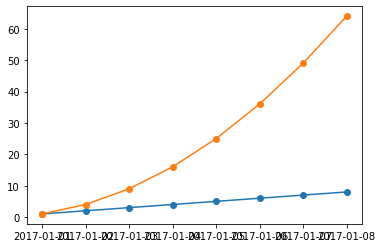

In [17]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()

obs_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(obs_dates, linear_data, '-o', obs_dates, quadratic_data, '-o')

## Using dates with pandas

RuntimeError: matplotlib does not support generators as input

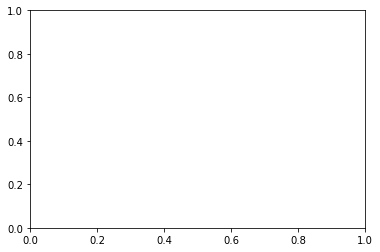

In [18]:
import pandas as pd

plt.figure()
obs_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# trying to plot map will result in an error
obs_dates = map(pd.to_datetime, obs_dates)
plt.plot(obs_dates, linear_data, '-o', obs_dates, quadratic_data, '-o')

In [ ]:
plt.figure()
obs_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# convert the map to a list to avoid the error
obs_dates = list(map(pd.to_datetime, obs_dates))
plt.plot(obs_dates, linear_data, '-o', obs_dates, quadratic_data, '-o')

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

ax = plt.gca()
ax.set_xlabel('Dates')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

# title with mathematical expressions
ax.set_title('Exponential ($x^2$) vs. Linear ($x$) performance')

# Bar charts

<BarContainer object of 8 artists>

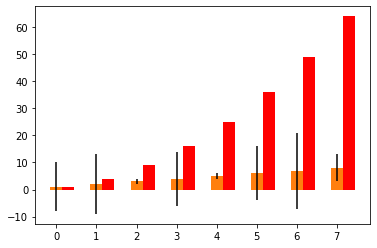

In [81]:
plt.figure()

xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3)

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
new_xvals = []
for item in xvals:
    new_xvals.append(item + 0.3)

plt.bar(new_xvals, quadratic_data, width=0.3, color='red')

from random import randint
linear_err = [randint(0, 15) for x in range(len(linear_data))]

# this will plot a new set of bars with errorbars using the list of random error variables
plt.bar(xvals, linear_data, width=0.3, yerr=linear_err)

<BarContainer object of 8 artists>

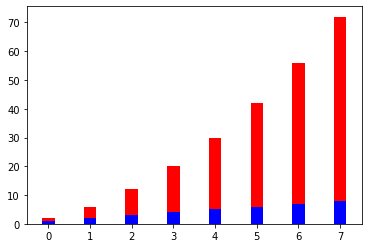

In [82]:
# Creating stacked bar charts

plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3, color='b')
plt.bar(xvals, quadratic_data, width=0.3, bottom=linear_data, color='r')

<BarContainer object of 8 artists>

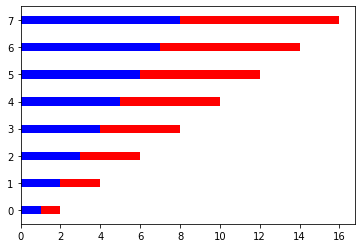

In [87]:
# Creating horizontal stacked bar charts

plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height=0.3, color='b')
plt.barh(xvals, linear_data, left=linear_data, height= 0.3, color='r')

# Dejunkifying a plot

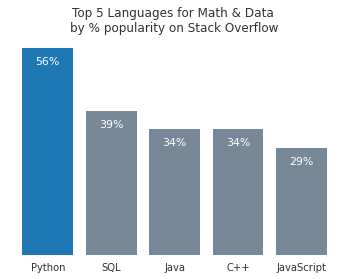

In [111]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# TODO: change the bar colors to be less bright blue
# TODO: make one bar, the python bar, a contrasting color
colors = ['#1F77B4', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey']

plt.bar(pos, popularity, align='center', color=colors)

# TODO: soften all labels by turning grey
plt.xticks(pos, languages, alpha = 0.8)

# TODO: remove the Y label since bars are directly labeled
# plt.ylabel('% Popularity', alpha = 0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelleft=False)

# remove the frame
plt.box(on=None)

# TODO: direct label each bar with Y axis values
ax = plt.gca()

# get a list of bars in the plot
rects = ax.patches

# get the labels
labels = popularity

# add labels using the ax.text method
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height - 5, str(label) + '%',
            ha='center', va='bottom', color='w', fontsize=11)

plt.show()